In [74]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

# plot_confusion_matrix is a handy visual tool, added in the latest version of scikit-learn
# if you are running an older version, comment out this line and just use confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import plot_roc_curve

In [75]:
features_df = pd.read_csv('data/training_set_features.csv')

In [76]:
labels_df = pd.read_csv('data/training_set_labels.csv')

In [77]:
features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [78]:
labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [79]:
df = pd.merge(labels_df,features_df,on='respondent_id')

In [80]:
df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [82]:
df.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26707.000000,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,0.212454,0.465608,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.409052,0.498825,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [83]:
df.isnull().sum()

respondent_id                      0
h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
s

In [84]:
df = df.drop(columns=['employment_occupation','employment_industry','health_insurance','respondent_id','h1n1_vaccine',
                 'h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective','opinion_h1n1_risk',
                 'opinion_h1n1_sick_from_vacc'])

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   seasonal_vaccine             26707 non-null  int64  
 1   behavioral_antiviral_meds    26707 non-null  float64
 2   behavioral_avoidance         26707 non-null  float64
 3   behavioral_face_mask         26707 non-null  float64
 4   behavioral_wash_hands        26707 non-null  float64
 5   behavioral_large_gatherings  26707 non-null  float64
 6   behavioral_outside_home      26707 non-null  float64
 7   behavioral_touch_face        26707 non-null  float64
 8   doctor_recc_seasonal         26707 non-null  float64
 9   chronic_med_condition        26707 non-null  float64
 10  child_under_6_months         26707 non-null  float64
 11  health_worker                26707 non-null  float64
 12  opinion_seas_vacc_effective  26707 non-null  float64
 13  opinion_seas_ris

In [93]:
df.age_group.value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [97]:
X_train_cat = X_train.select_dtypes('object')

ohe = OneHotEncoder(
    drop='first',
    sparse=False)

dums = ohe.fit_transform(X_train_cat)
dums_df = pd.DataFrame(dums,
                       columns=ohe.get_feature_names(),
                       index=X_train_cat.index)

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

#changed the age groups into two bins
0 = 18~44
1 = 45~65+

In [96]:
df.income_poverty.value_counts()

<= $75,000, Above Poverty    17200
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

In [ ]:
df = df.drop(columns=['race'])

In [85]:
df = df.fillna(df.mode().iloc[0])

In [86]:
df.isnull().sum()

seasonal_vaccine               0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
dtype: int64

In [87]:
# selecting numeric columns
num_df = df.select_dtypes(exclude='object')

num_df.dtypes

seasonal_vaccine                 int64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
household_adults               float64
household_children             float64
dtype: object

In [18]:
num_df.corr()

,seasonal_vaccine,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
seasonal_vaccine,1.000000,0.006013,0.076130,0.050020,0.112254,0.063722,0.053287,0.119925,0.360696,0.169465,0.013424,0.126977,0.358869,0.386916,-0.057066,-0.065137,-0.111680
behavioral_antiviral_meds,0.006013,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,0.031682,0.004637,0.026183,0.007145,0.014498,0.081503,0.078618,0.044829,0.083090
behavioral_avoidance,0.076130,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,0.070761,0.042054,0.000952,0.002232,0.117356,0.127991,0.084346,0.017995,0.038977
behavioral_face_mask,0.050020,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,0.065301,0.062200,0.036828,0.065645,0.040889,0.105917,0.084084,0.014191,0.004794
behavioral_wash_hands,0.112254,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,0.099317,0.030205,0.035749,0.052930,0.136936,0.170655,0.087218,0.009367,0.047451
behavioral_large_gatherings,0.063722,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,0.087315,0.099621,0.020074,-0.032226,0.078208,0.130800,0.131414,-0.030994,-0.009126
behavioral_outside_home,0.053287,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,0.081252,0.093675,0.016657,-0.035128,0.066861,0.117428,0.133080,-0.026542,-0.008937
behavioral_touch_face,0.119925,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,0.099753,0.029966,0.026506,0.066284,0.104530,0.141537,0.089156,-0.001233,0.023739
doctor_recc_seasonal,0.360696,0.031682,0.070761,0.065301,0.099317,0.087315,0.081252,0.099753,1.000000,0.203121,0.038741,0.058775,0.171801,0.228514,0.028387,-0.031818,-0.042053
chronic_med_condition,0.169465,0.004637,0.042054,0.062200,0.030205,0.099621,0.093675,0.029966,0.203121,1.000000,0.003533,-0.019810,0.093160,0.166381,0.061349,-0.067277,-0.102541


In [88]:
df

,seasonal_vaccine,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0
26703,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0
26704,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0
26705,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0


In [117]:
df

,seasonal_vaccine,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0
26703,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0
26704,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0
26705,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0


## Train-test splitting

In [132]:
X = df.drop(columns='seasonal_vaccine')
y = df['seasonal_vaccine']

In [145]:
col = ['behavioral_antiviral_meds','behavioral_avoidance',
       'behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings',
       'behavioral_outside_home','behavioral_touch_face','doctor_recc_seasonal',
       'chronic_med_condition','child_under_6_months','health_worker','opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc','household_adults','household_children',
       'x0_35 - 44 Years', 'x0_45 - 54 Years','x0_55 - 64 Years','x0_65+ Years',
       'x1_< 12 Years','x1_College Graduate','x1_Some College','x2_Hispanic','x2_Other or Multiple',
       'x2_White', 'x3_Male', 'x4_> $75,000', 'x4_Below Poverty', 'x5_Not Married', 'x6_Rent', 
       'x7_Not in Labor Force', 'x7_Unemployed', 'x8_bhuqouqj', 'x8_dqpwygqj','x8_fpwskwrf', 'x8_kbazzjca',
       'x8_lrircsnp','x8_lzgpxyit','x8_mlyzmhmf','x8_oxchjgsf', 'x8_qufhixun','x9_MSA, Principle City', 'x9_Non-MSA']

In [146]:
pd.set_option('display.max_columns', None)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [148]:
X_train_cat = X_train.select_dtypes('object')

ohe = OneHotEncoder(
    drop='first',
    sparse=False)

dums = ohe.fit_transform(X_train_cat)
dums_df = pd.DataFrame(dums,
                       columns=ohe.get_feature_names(),
                       index=X_train_cat.index)

In [149]:
X_train_nums = X_train.select_dtypes('float64')

ss = StandardScaler()

ss.fit(X_train_nums)
nums_df = pd.DataFrame(ss.transform(X_train_nums),
                      index=X_train_nums.index)

In [155]:
X_train_clean = pd.concat([nums_df, dums_df], axis=1)

In [156]:
X_train_clean.columns = col

In [157]:
X_train_clean

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x2_Hispanic,x2_Other or Multiple,x2_White,x3_Male,"x4_> $75,000",x4_Below Poverty,x5_Not Married,x6_Rent,x7_Not in Labor Force,x7_Unemployed,x8_bhuqouqj,x8_dqpwygqj,x8_fpwskwrf,x8_kbazzjca,x8_lrircsnp,x8_lzgpxyit,x8_mlyzmhmf,x8_oxchjgsf,x8_qufhixun,"x9_MSA, Principle City",x9_Non-MSA
15654,-0.221158,-1.636851,-0.271702,-2.186473,1.334461,-0.708087,0.691304,1.509737,1.626998,-0.295743,-0.346856,-0.022911,0.939177,1.440622,0.151710,-0.573503,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14559,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-0.517966,-0.068447,-1.185177,-0.573503,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13752,-0.221158,-1.636851,-0.271702,0.457358,1.334461,-0.708087,0.691304,-0.662367,1.626998,-0.295743,-0.346856,0.904171,1.667749,-0.822981,0.151710,-0.573503,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
21985,-0.221158,-1.636851,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-1.246538,-0.822981,0.151710,-0.573503,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
18196,-0.221158,-1.636851,-0.271702,0.457358,-0.749366,-0.708087,0.691304,1.509737,-0.614629,-0.295743,-0.346856,0.904171,-0.517966,-0.068447,0.151710,-0.573503,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-1.877075,-1.246538,-0.822981,0.151710,2.676383,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17289,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-0.517966,-0.068447,-1.185177,0.509792,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5192,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,1.509737,-0.614629,-0.295743,-0.346856,0.904171,0.939177,1.440622,0.151710,-0.573503,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12172,-0.221158,0.610929,3.680505,0.457358,1.334461,1.412257,0.691304,-0.662367,-0.614629,3.381312,-0.346856,0.904171,0.939177,-0.822981,-1.185177,-0.573503,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Test Set

In [162]:
X_test_cat = X_test.select_dtypes('object')

test_dums = ohe.transform(X_test_cat)
test_dums_df = pd.DataFrame(test_dums,
                       columns=ohe.get_feature_names(),
                      index=X_test_cat.index)

In [163]:
X_test_nums = X_test.select_dtypes('float64')

test_nums = ss.transform(X_test_nums)
test_nums_df = pd.DataFrame(test_nums,
                           index=X_test_nums.index)

In [164]:
X_test_clean = pd.concat([test_nums_df,
                 test_dums_df], axis=1)

In [165]:
X_test_clean.columns = col

In [166]:
X_test_clean

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x2_Hispanic,x2_Other or Multiple,x2_White,x3_Male,"x4_> $75,000",x4_Below Poverty,x5_Not Married,x6_Rent,x7_Not in Labor Force,x7_Unemployed,x8_bhuqouqj,x8_dqpwygqj,x8_fpwskwrf,x8_kbazzjca,x8_lrircsnp,x8_lzgpxyit,x8_mlyzmhmf,x8_oxchjgsf,x8_qufhixun,"x9_MSA, Principle City",x9_Non-MSA
25567,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,1.509737,1.626998,-0.295743,-0.346856,-0.022911,0.210606,-0.822981,0.151710,-0.573503,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6023,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-1.877075,0.939177,-0.822981,-1.185177,1.593088,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
22055,-0.221158,-1.636851,-0.271702,-2.186473,-0.749366,-0.708087,0.691304,1.509737,1.626998,3.381312,-0.346856,0.904171,1.667749,2.195157,1.488596,-0.573503,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7914,-0.221158,0.610929,-0.271702,-2.186473,1.334461,1.412257,0.691304,1.509737,1.626998,-0.295743,2.883045,-0.022911,1.667749,1.440622,0.151710,-0.573503,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12380,-0.221158,-1.636851,-0.271702,0.457358,1.334461,-0.708087,-1.446541,1.509737,-0.614629,-0.295743,-0.346856,0.904171,1.667749,-0.068447,0.151710,0.509792,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-0.517966,2.195157,0.151710,-0.573503,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1060,-0.221158,-1.636851,-0.271702,0.457358,1.334461,-0.708087,-1.446541,-0.662367,1.626998,-0.295743,-0.346856,-1.877075,-1.246538,-0.068447,-1.185177,-0.573503,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23125,-0.221158,-1.636851,-0.271702,-2.186473,-0.749366,-0.708087,-1.446541,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-0.517966,-0.068447,1.488596,-0.573503,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14895,-0.221158,0.610929,-0.271702,0.457358,-0.749366,-0.708087,0.691304,-0.662367,-0.614629,-0.295743,-0.346856,-0.022911,-1.246538,-0.822981,1.488596,-0.573503,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Ordinal Encoder

In [67]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)

In [68]:
X_combined = np.r_[X_train, X_test]
y_combined = np.r_[y_train, y_test]

In [69]:
X_combined

array([[0., 0., 0., ..., 2., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 2., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 1., 0., ..., 0., 2., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [70]:
col = ['behavioral_antiviral_meds','behavioral_avoidance',
       'behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings',
       'behavioral_outside_home','behavioral_touch_face','doctor_recc_seasonal',
       'chronic_med_condition','child_under_6_months','health_worker','opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc','age_group','education','sex','income_poverty',
       'household_adults','household_children']

In [71]:
df1=pd.DataFrame(X_combined, columns=col)
df1

ValueError: Shape of passed values is (26707, 26), indices imply (26707, 19)

In [49]:
df2 = pd.DataFrame(y_combined, columns = ['seasonal_vaccine'])
df2

,seasonal_vaccine
0,1
1,1
2,1
3,0
4,1
...,...
26702,0
26703,0
26704,0
26705,0


In [53]:
result = pd.concat([df2, df1], axis=1).reindex(df2.index)
result

,seasonal_vaccine,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,3.0,1.0,0.0
1,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0
2,1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0
3,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,1.0,0.0
26703,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
26704,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,2.0,0.0
26705,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0


In [57]:
result.age_group.value_counts()

AttributeError: 'DataFrame' object has no attribute 'age_group'

## 1st Model:  Dummy Classifier

In [176]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [179]:
dummy_clf.fit(X_train_clean, y_train)

DummyClassifier(strategy='most_frequent')

In [180]:
dummy_clf.predict(X_train_clean)[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Dummy Model Evaluation

In [181]:
cv_results = cross_val_score(dummy_clf, X_train_clean, y_train, cv=10)
cv_results.mean()

0.5308537194208686

### Confusion Matrix

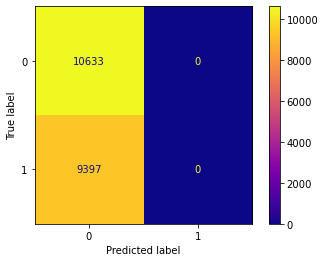

In [183]:
plot_confusion_matrix(dummy_clf, X_train_clean, y_train, cmap="plasma");

In [185]:
confusion_matrix(y_train, dummy_clf.predict(X_train_clean))

array([[10633,     0],
       [ 9397,     0]])

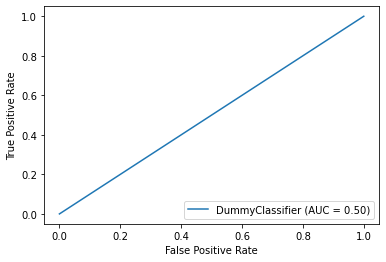

In [186]:
plot_roc_curve(dummy_clf, X_train_clean, y_train);

## 2nd Model: Logistic Regression 

In [187]:
first_logreg_model = LogisticRegression(random_state=1, penalty='none')

In [188]:
first_logreg_model.fit(X_train_clean, y_train)

LogisticRegression(penalty='none', random_state=1)

In [189]:
y_pred = first_logreg_model.predict(X_train_clean)

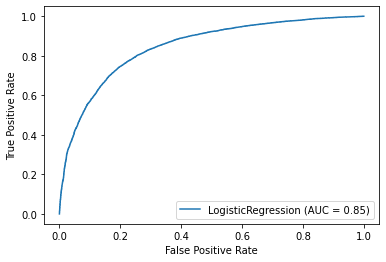

In [190]:
plot_roc_curve(first_logreg_model, X_train_clean, y_train)

## 2nd Model Evaluation

In [191]:
cv_logregresults = cross_val_score(first_logreg_model, X_train_clean, y_train, cv=10)

cv_logregresults.mean()

0.7735396904643036

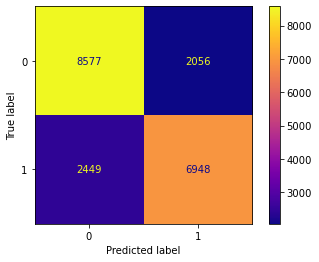

In [192]:
plot_confusion_matrix(first_logreg_model, X_train_clean, y_train, cmap="plasma");

In [194]:
confusion_matrix(y_train, first_logreg_model.predict(X_train_clean))

array([[8577, 2056],
       [2449, 6948]])

In [195]:
precision_score(y_train, y_pred)

0.7716570413149711

In [196]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     10633
           1       0.77      0.74      0.76      9397

    accuracy                           0.78     20030
   macro avg       0.77      0.77      0.77     20030
weighted avg       0.77      0.78      0.77     20030



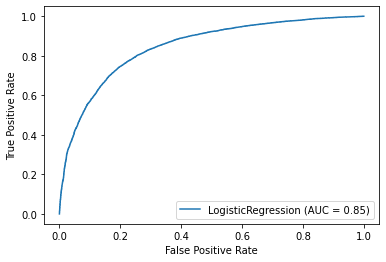

In [197]:
plot_roc_curve(first_logreg_model, X_train_clean, y_train)